**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: Clara Janet Rivera Medina
*   MATRÍCULA: A01173512

*   NOMBRE: Clara Janet Rivera Medina
*   MATRÍCULA: A01173512

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import os
# DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 7/Actividad7_PCA"
# os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe. 

In [5]:
cereals_df['shelf'] = cereals_df['shelf'].astype('category')
numeric_columns = cereals_df.select_dtypes(include=np.number).columns.tolist()
categorial_columns = cereals_df.select_dtypes(exclude=np.number).columns.tolist()

In [6]:
cereals_df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,76.0,14.802632,3.907326,5.000000,12.000000,14.500000,17.000000,23.000000
sugars,76.0,7.026316,4.378656,0.000000,3.000000,7.000000,11.000000,15.000000
potass,75.0,98.666667,70.410636,15.000000,42.500000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
weight,77.0,1.029610,0.150477,0.500000,1.000000,1.000000,1.000000,1.500000


In [7]:
cereals_df[categorial_columns].describe().T

,count,unique,top,freq
name,77,77,100%_Bran,1
mfr,77,7,K,23
type,77,2,C,74
shelf,77,3,3,36


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico. 

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)? 
- `mfr`
    - Kelloggs: 23
    - General Mills: 22
    - Post: 9
    - Ralston Purina: 8
    - Quaker Oats: 8
    - Nabisco: 6
    - American Home Food Products: 1
- `shelf`
    - 3 (top): 36
    - 2 (middle): 21
    - 1 (floor): 20

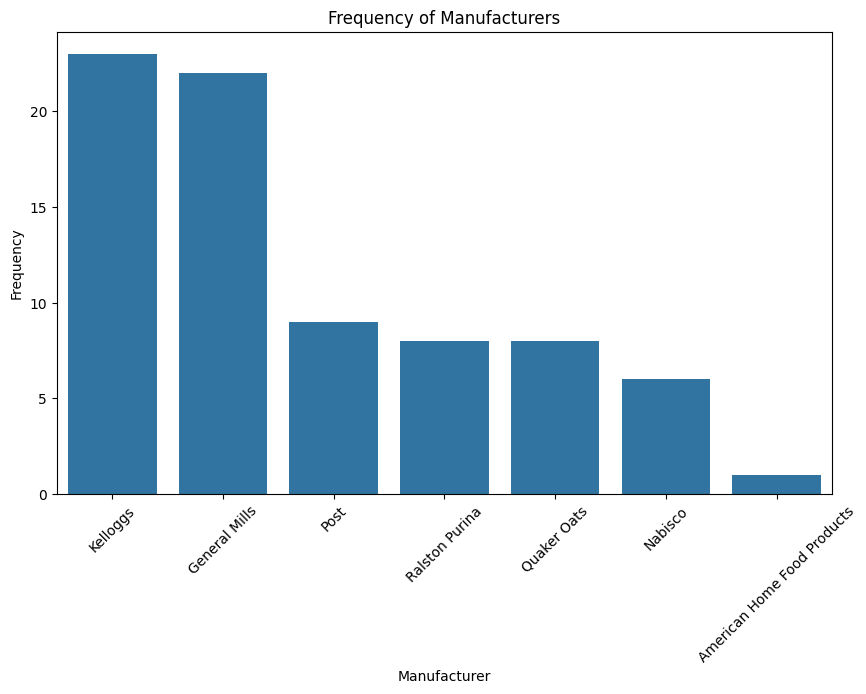

In [8]:
cereal_manufacturers = {
    "A": "American Home Food Products",
    "G": "General Mills",
    "K": "Kelloggs",
    "N": "Nabisco",
    "P": "Post",
    "Q": "Quaker Oats",
    "R": "Ralston Purina"
}

cereals_df['mfr'] = cereals_df['mfr'].map(cereal_manufacturers)

plt.figure(figsize=(10, 6))
sns.countplot(x='mfr', data=cereals_df, order=cereals_df['mfr'].value_counts().index)
plt.title('Frequency of Manufacturers')
plt.xlabel('Manufacturer')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

In [9]:
cereals_df['mfr'].value_counts()

mfr
Kelloggs                       23
General Mills                  22
Post                            9
Ralston Purina                  8
Quaker Oats                     8
Nabisco                         6
American Home Food Products     1
Name: count, dtype: int64

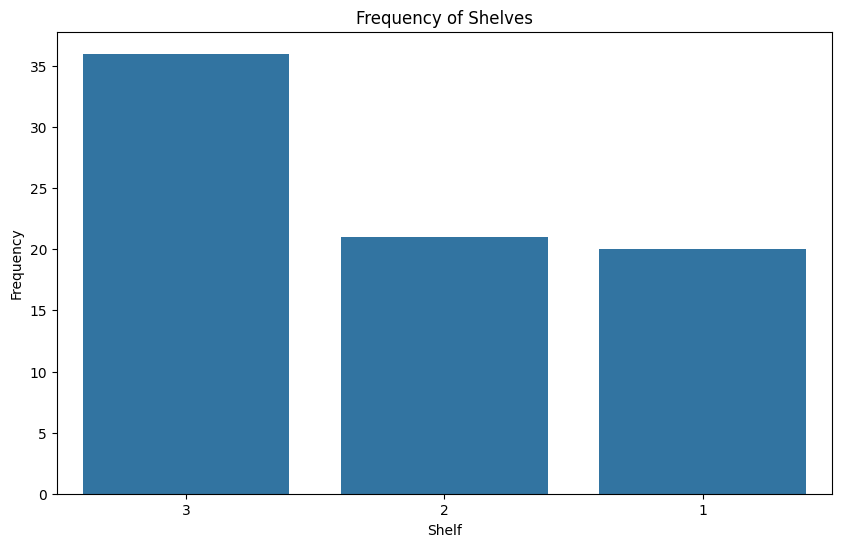

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='shelf', data=cereals_df, order=cereals_df['shelf'].value_counts().index)
plt.title('Frequency of Shelves')
plt.xlabel('Shelf')
plt.ylabel('Frequency')
plt.show()

In [11]:
cereals_df['shelf'].value_counts()

shelf
3    36
2    21
1    20
Name: count, dtype: int64

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante. 

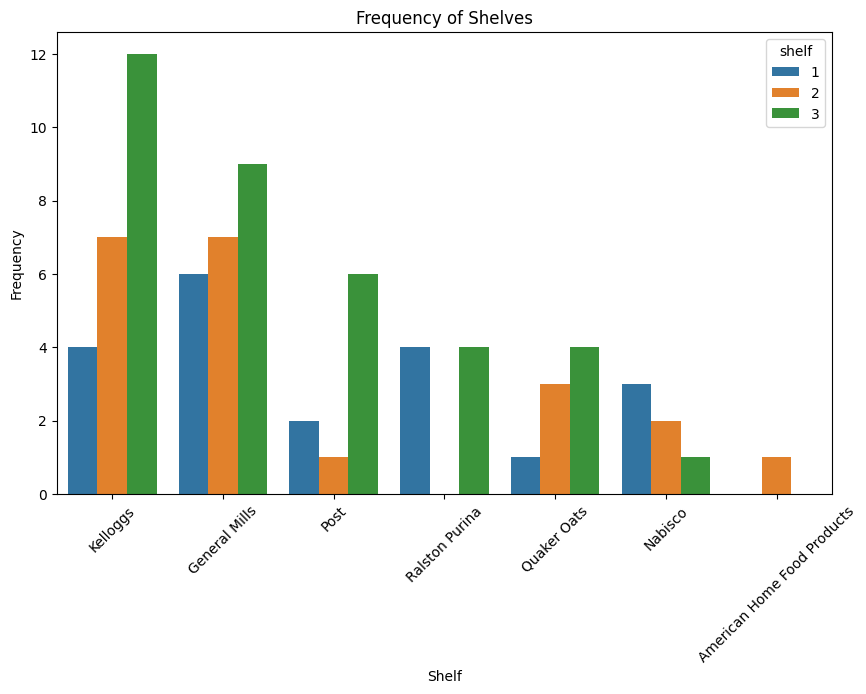

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='mfr', data=cereals_df, order=cereals_df['mfr'].value_counts().index, hue='shelf')
plt.title('Frequency of Shelves')
plt.xlabel('Shelf')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [13]:
pd.crosstab(cereals_df['mfr'], cereals_df['shelf'])


shelf,1,2,3
mfr,,,
American Home Food Products,0,1,0
General Mills,6,7,9
Kelloggs,4,7,12
Nabisco,3,2,1
Post,2,1,6
Quaker Oats,1,3,4
Ralston Purina,4,0,4


3a) ¿Cuál es el rango más frecuente de la variable `rating`?

- El rango es entre 33.18 a 40.74

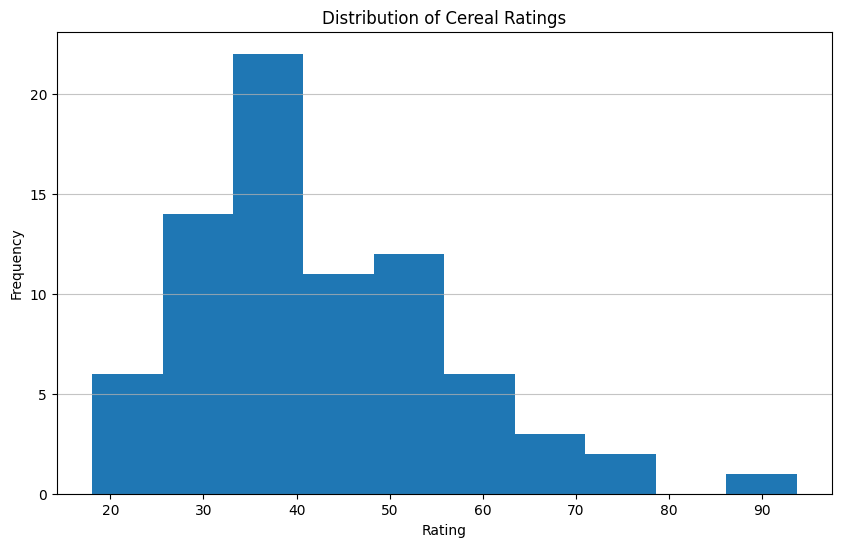

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(cereals_df['rating'], bins=10)
plt.title('Distribution of Cereal Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [15]:
counts, bin_edges = np.histogram(cereals_df['rating'], bins=10)
most_frequent_bin_index = np.argmax(counts)
most_frequent_range = (bin_edges[most_frequent_bin_index], bin_edges[most_frequent_bin_index + 1])

print(f"The most frequent range of 'rating' is between {most_frequent_range[0]:.2f} and {most_frequent_range[1]:.2f}.")

The most frequent range of 'rating' is between 33.18 and 40.74.


3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden? 

- Los 10 cereales mejor evaluados son:
    - All-Bran_with_Extra_Fiber
    - Shredded_Wheat_'n'Bran
    - Shredded_Wheat_spoon_size
    - 100%_Bran
    - Shredded_Wheat
    - Cream_of_Wheat_(Quick)
    - Puffed_Wheat
    - Puffed_Rice
    - Nutri-grain_Wheat
    - All-Bran
- Y corresponden a los siguientes fabricantes:
    - Kelloggs
    - Nabisco
    - Quaker Oats

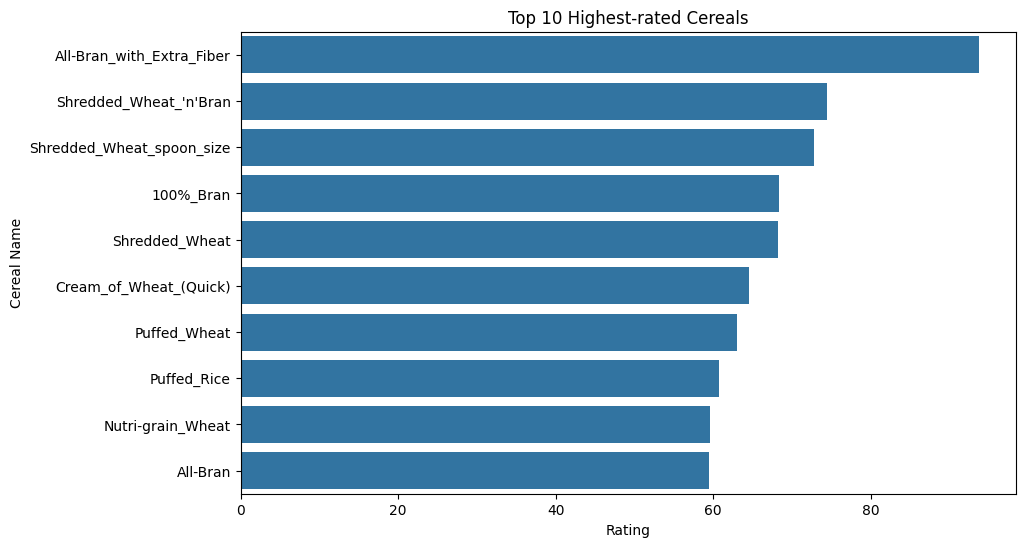

In [16]:
top_10_cereals_df = cereals_df.sort_values(by='rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='name', data=top_10_cereals_df)
plt.title('Top 10 Highest-rated Cereals')
plt.xlabel('Rating')
plt.ylabel('Cereal Name')
plt.show()

In [17]:

top_10_cereals_info = top_10_cereals_df[['name', 'rating', 'mfr']]
print(top_10_cereals_info)

                         name     rating          mfr
3   All-Bran_with_Extra_Fiber  93.704912     Kelloggs
64     Shredded_Wheat_'n'Bran  74.472949      Nabisco
65  Shredded_Wheat_spoon_size  72.801787      Nabisco
0                   100%_Bran  68.402973      Nabisco
63             Shredded_Wheat  68.235885      Nabisco
20     Cream_of_Wheat_(Quick)  64.533816      Nabisco
55               Puffed_Wheat  63.005645  Quaker Oats
54                Puffed_Rice  60.756112  Quaker Oats
50          Nutri-grain_Wheat  59.642837     Kelloggs
2                    All-Bran  59.425505     Kelloggs


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots. 

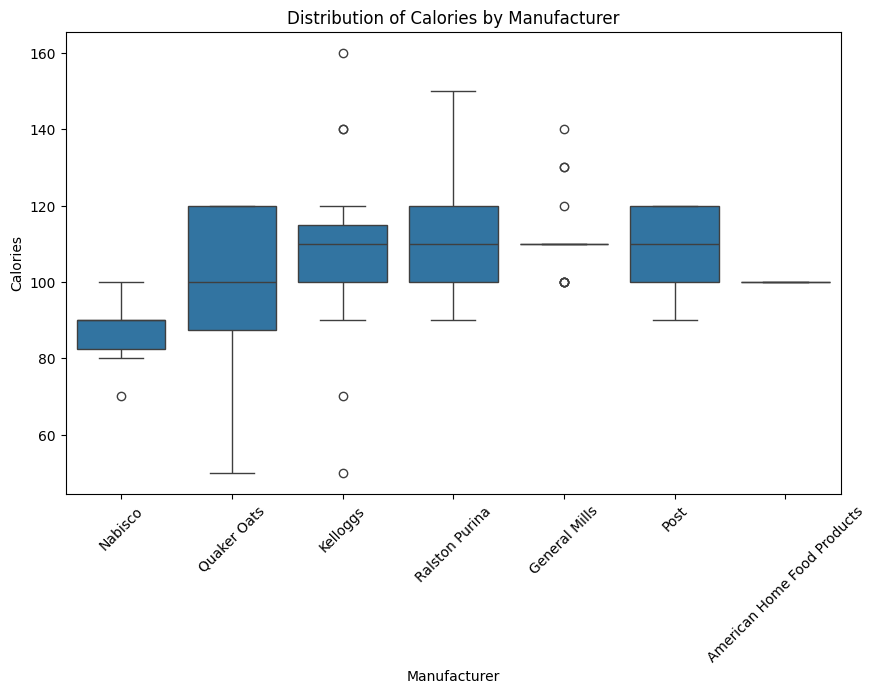

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mfr', y='calories', data=cereals_df)
plt.title('Distribution of Calories by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.show()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`? 

- Sugar
- Calories

In [19]:
correlation_matrix = cereals_df[numeric_columns].corr()
rating_correlation = correlation_matrix['rating'].drop('rating').sort_values(key=abs, ascending=False)
top_two_correlated_variables = rating_correlation.head(2)
top_two_correlated_variables

sugars     -0.763902
calories   -0.689376
Name: rating, dtype: float64

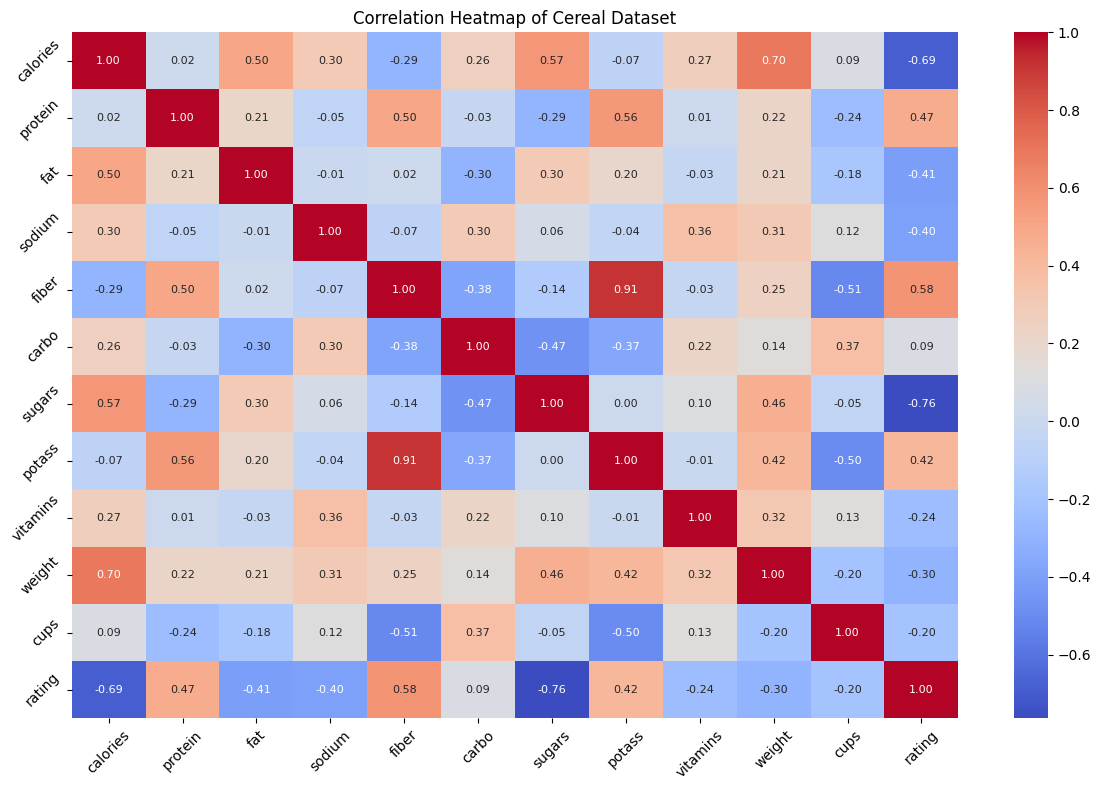

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, annot_kws={"size": 8})
plt.title('Correlation Heatmap of Cereal Dataset')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos. 

In [21]:
cereals_df.isna().mean() * 100

name        0.000000
mfr         0.000000
type        0.000000
calories    0.000000
protein     0.000000
fat         0.000000
sodium      0.000000
fiber       0.000000
carbo       1.298701
sugars      1.298701
potass      2.597403
vitamins    0.000000
shelf       0.000000
weight      0.000000
cups        0.000000
rating      0.000000
dtype: float64

In [22]:
cereals_df = cereals_df.dropna()
cereals_df = cereals_df.reset_index(drop=True)

# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores. 

In [23]:
y = cereals_df['rating']
X = cereals_df[numeric_columns].drop(columns=['rating'])


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes. 

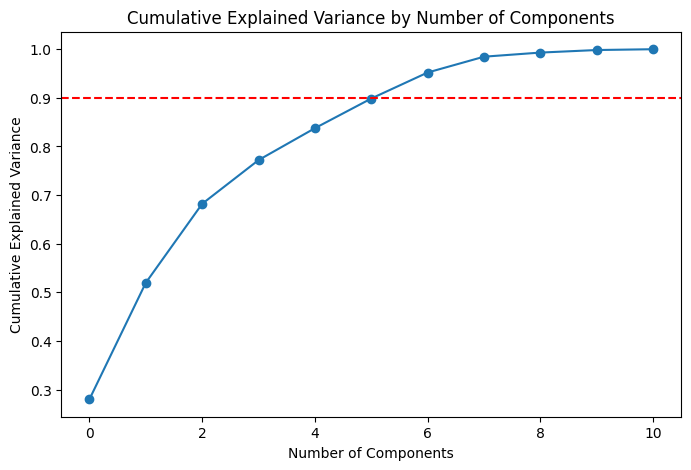

In [26]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.show()

In [27]:
num_components_for_90_variance = np.argmax(cumulative_explained_variance >= 0.9) + 1
print(f"Number of components explaining at least 90% variance: {num_components_for_90_variance}")


Number of components explaining at least 90% variance: 7


In [28]:
components_for_90_variance = pca.components_[:num_components_for_90_variance]


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


In [29]:
first_component_loadings = np.abs(pca.components_[0])
top_three_variables_indices = np.argsort(first_component_loadings)[-3:]
top_three_variables = [X.columns[i] for i in top_three_variables_indices]
print(f"Top three variables for the first component: {top_three_variables}")

Top three variables for the first component: ['cups', 'fiber', 'potass']


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica. 

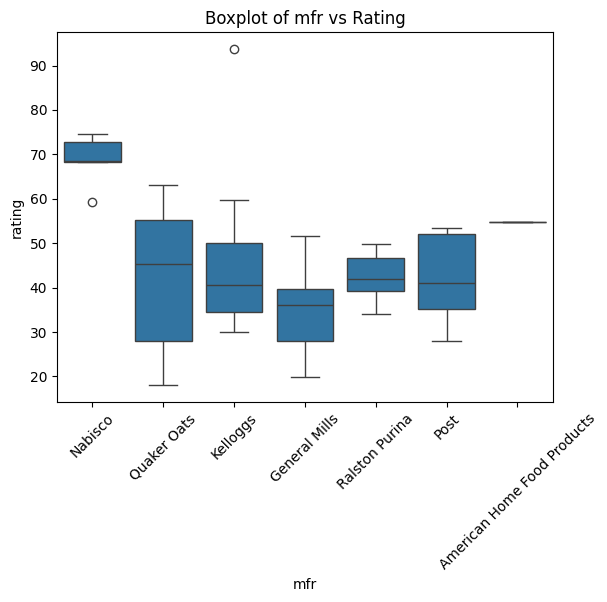

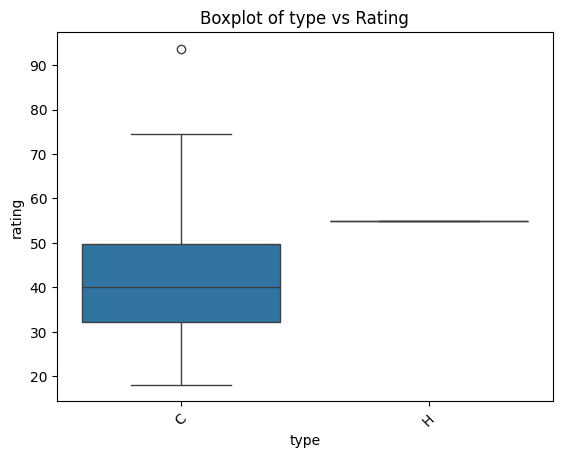

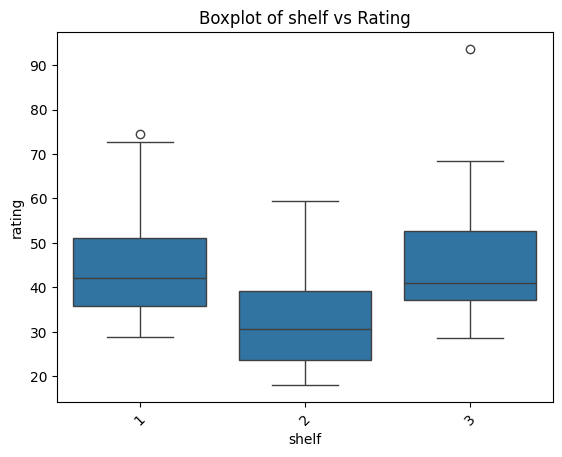

In [30]:
categorical_predictors = ['mfr', 'type', 'shelf']

for var in categorical_predictors:
    sns.boxplot(x=var, y='rating', data=cereals_df)
    plt.title(f'Boxplot of {var} vs Rating')
    plt.xticks(rotation=45)
    plt.show()

In [31]:
results = {}

for cat_col in categorical_predictors:
    # Create groups based on categorical values
    groups = [group['rating'].values for name, group in cereals_df.groupby(cat_col, observed=False)]
    
    # Perform one-way ANOVA
    f_stat, p_value = stats.f_oneway(*groups)
    
    results[cat_col] = {
        'F-statistic': f_stat,
        'p-value': p_value
    }

results_df = pd.DataFrame(results).T
predictors = results_df[results_df['p-value'] < 0.05].index.tolist()
predictors

['mfr', 'shelf']

10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo. 

In [32]:
cereals_df[predictors].describe()

,mfr,shelf
count,74,74
unique,7,3
top,Kelloggs,3
freq,23,35


In [33]:
num_components = num_components_for_90_variance
X_pca_selected = X_pca[:, :num_components]

encoded_categoricals_df = pd.get_dummies(cereals_df['mfr'], drop_first=True)
encoded_categoricals_df = encoded_categoricals_df.astype(np.int8)
encoded_categoricals_df['shelf'] = cereals_df['shelf']

pca_components_df = pd.DataFrame(X_pca_selected, columns=[f'PC{i+1}' for i in range(num_components)])

final_df = pd.concat([pca_components_df, encoded_categoricals_df, y.reset_index(drop=True)], axis=1)
final_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,General Mills,Kelloggs,Nabisco,Post,Quaker Oats,Ralston Purina,shelf,rating
0,5.041308,-2.470097,-0.054581,-1.129434,0.667588,0.640401,-0.022399,0,0,1,0,0,0,3,68.402973
1,1.503568,0.310316,-3.014154,3.202758,1.344651,0.066992,0.396573,0,0,0,0,1,0,3,33.983679
2,4.866598,-1.946814,0.869813,-1.225550,0.358265,1.832924,0.232872,0,1,0,0,0,0,3,59.425505
3,5.468886,-3.899001,1.883856,-1.628993,0.601691,0.374002,0.811525,0,1,0,0,0,0,3,93.704912
4,0.088378,0.391583,-1.490079,0.054716,0.331903,0.848360,-0.271351,1,0,0,0,0,0,1,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.442524,0.260808,1.160446,0.531351,-1.053122,0.817503,-0.665223,1,0,0,0,0,0,3,39.106174
70,-1.634842,0.417530,-1.672206,-0.593553,0.134293,-0.082682,0.257906,1,0,0,0,0,0,2,27.753301
71,0.389697,-0.475626,1.182007,0.334499,-0.494861,0.820825,-0.328101,0,0,0,0,0,1,1,49.787445
72,-0.172304,-0.491070,1.163945,0.580625,0.146570,0.290806,0.627485,1,0,0,0,0,0,1,51.592193
